# **02. Neural Network Classification**

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

## **1. Make classification data and get it ready**

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X\n: {X[:5]}")
print(f"First 5 samples y\n: {y[:5]}")

First 5 samples of X
: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples y
: [1 1 1 1 0]


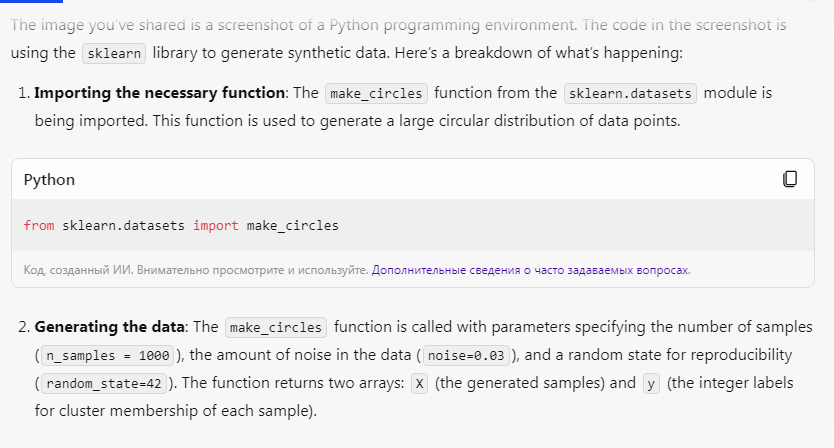

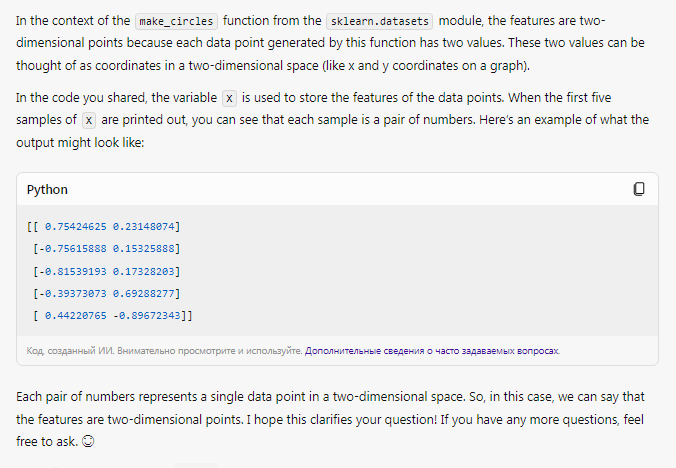

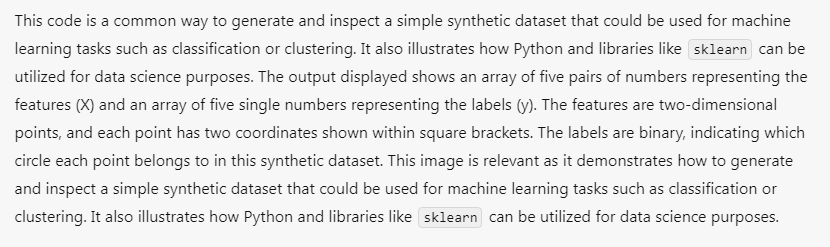

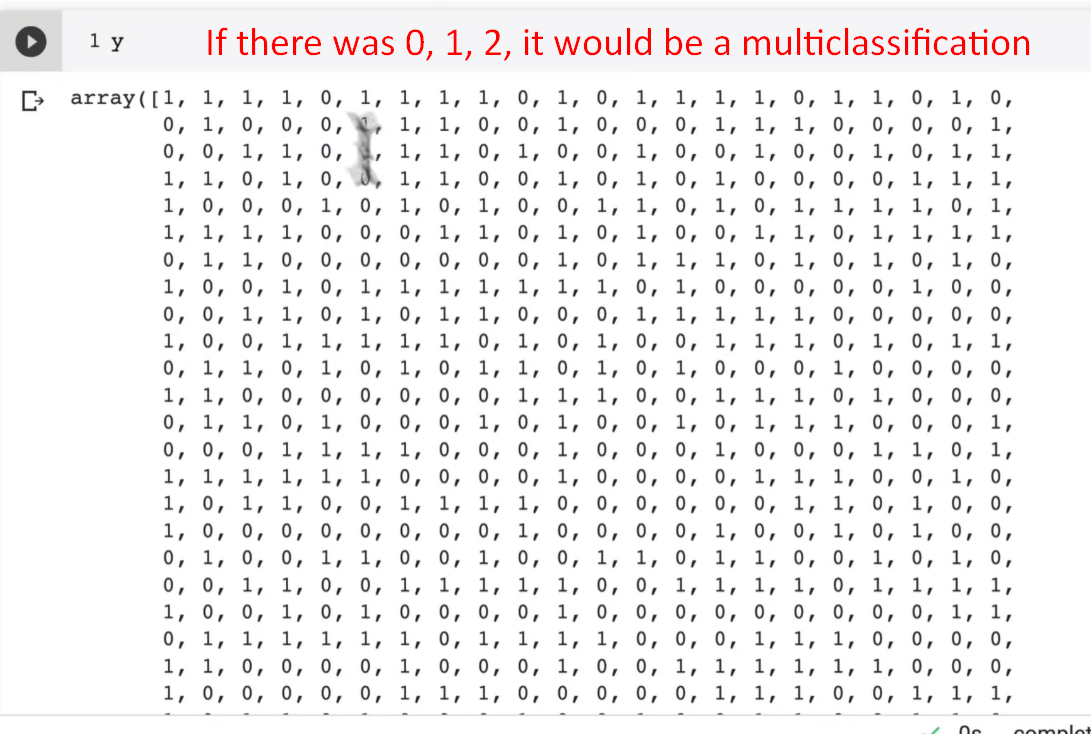

### **The code snippet is using the pandas library in Python to create a DataFrame. A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns). It’s one of the most commonly used data structures in data analysis and manipulation.**

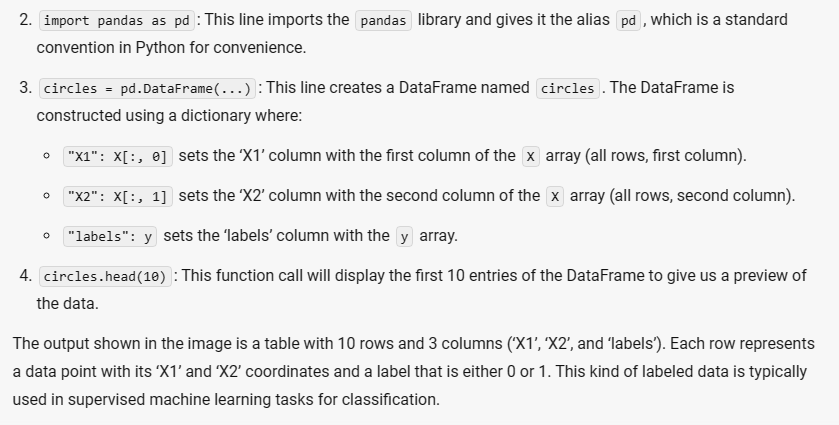

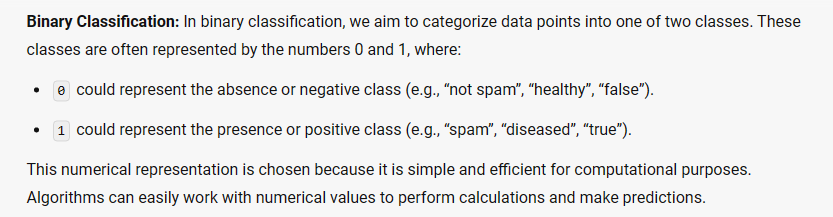

In [ ]:
# Make a DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "labels": y})

circles.head(10)

X1        X2  labels
0  0.754246  0.231481       1
1 -0.756159  0.153259       1
2 -0.815392  0.173282       1
3 -0.393731  0.692883       1
4  0.442208 -0.896723       0
5 -0.479646  0.676435       1
6 -0.013648  0.803349       1
7  0.771513  0.147760       1
8 -0.169322 -0.793456       1
9 -0.121486  1.021509       0

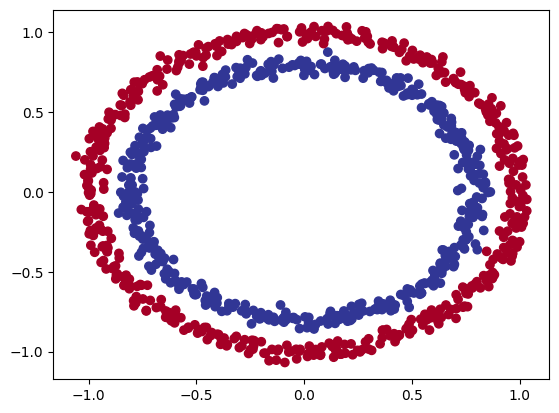

In [ ]:
# Visualize, Visualize, Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
                y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

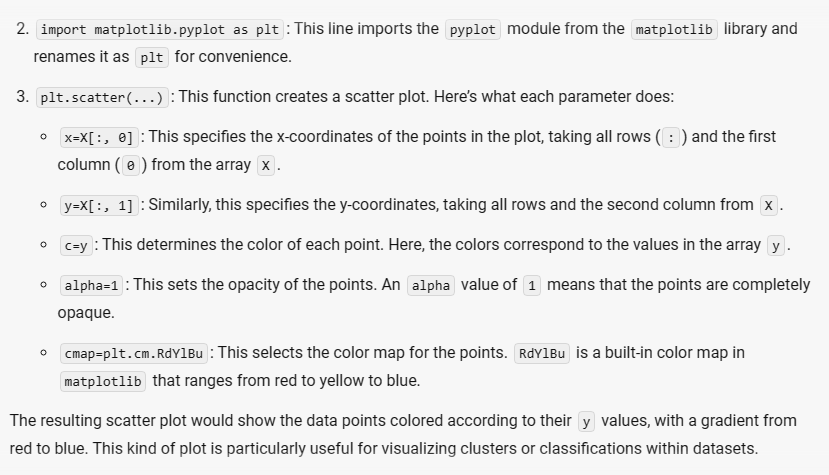

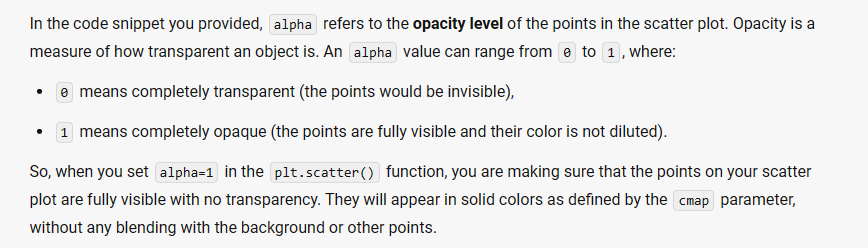

**NOTE:** The data we're working with is often referred to as a toy dataset. A dataset that is small enough to experiment but still sizeable enough to practice the fundamentals.

### **1.1 Check input and output shapes**

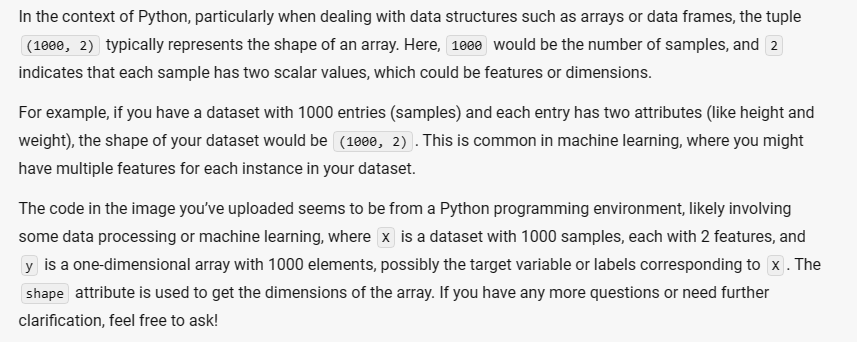

### **VISUAL EXAMPLE**

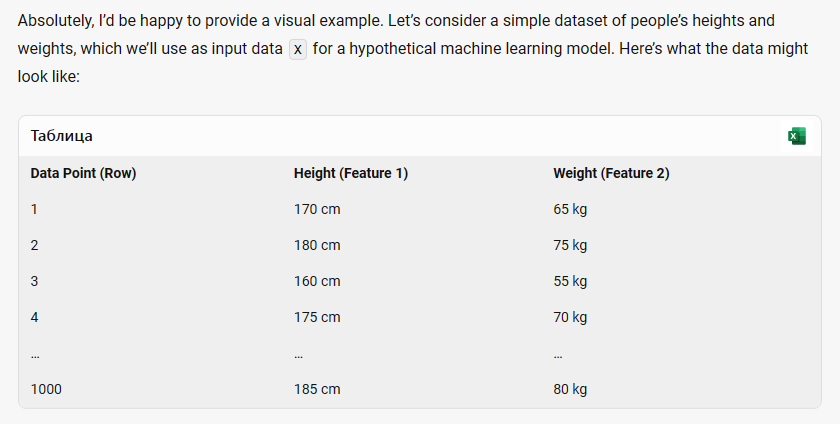

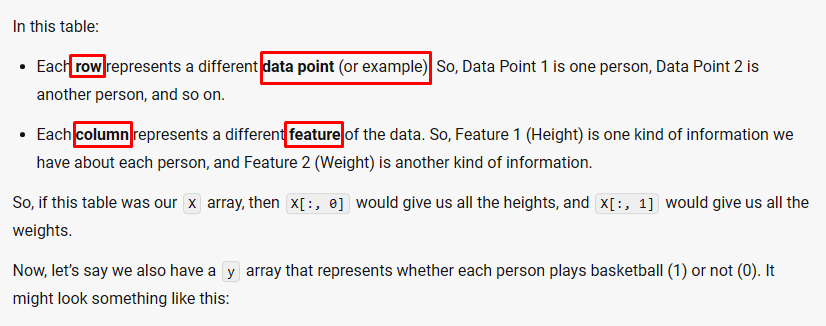

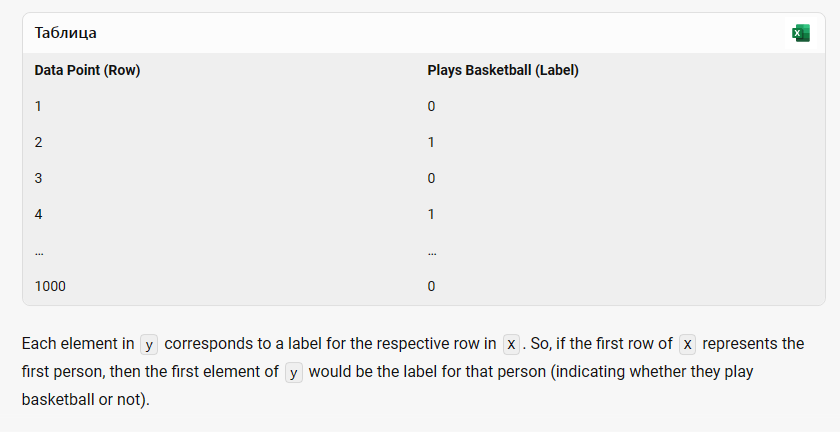

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

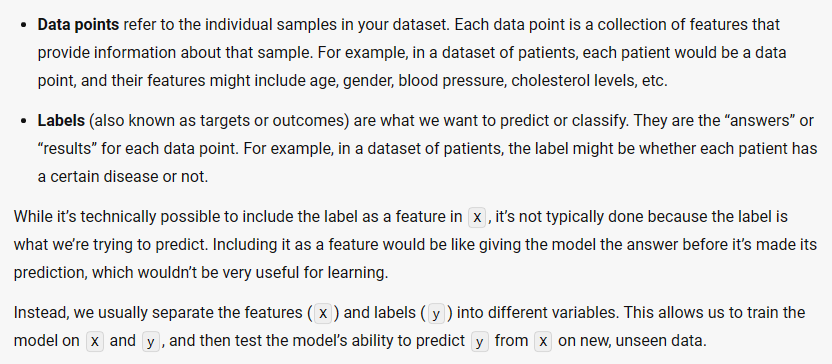

In [ ]:
# View the first example of features and labels.
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for 1
Shapes for one sample of X: (2,) and the same for ()


### **1.2 Turn data into TENSORS and CREATE train and test splits**

In [ ]:
import torch
torch.__version__

'2.3.0+cu121'

In [ ]:
# NumPy supports float 64 ARRAYS.
# PyTorch supports float 32 TENSORS (arrays)

type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
# Turn data into TENSORS
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# We turned into TENSORS and FLOAT 32
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
# Split data into training and test sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 0.2 = 20% out of 1000 samples will be test & 0.8 = 80% out of 1000 will be train.
                                                    random_state=42)

In [ ]:
# Note: In TRAINING SET the model will learn PATTERNS (red dots or blue dots in our case)
# TEST DATASET will EVALUATE those PATTERNS
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

### **2. Building a model**

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one.
2. Construct a model (by subclassing 'nn.Module') All models subclass nn.Module in PyTroch
3. Define a loss function and optimizer
4. Create a training and a test loop.

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available else 'cpu' # CPU is by default. CUDA = GPU
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, let's create a model that:
1. Subclasses **nn.Module** (Almost all models in PyTorch subclass **nn.Module**)
2. Creates **2 nn.Linear() layers** that are capable of handling the shapes of our data.
3. Defines a **forward()** method that outlines the forward pass (or forward computation) of the model.
4. Instantiate an instance of our model class and send it to the target **device**

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

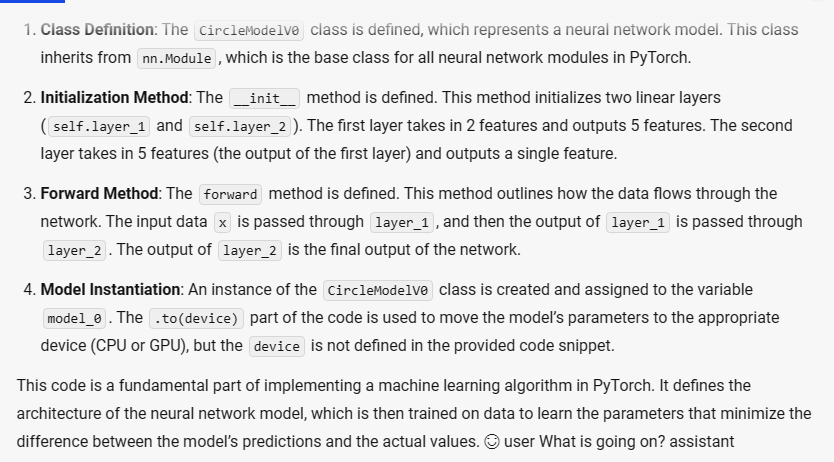

**NEURAL NETWORK ALGORITHM**

In [ ]:
from sklearn import datasets
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data.
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from previous layer and outputs a single feature (same shape as y)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

**SEQUENTIAL ALGORITHM**

In [ ]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Our model is in fact instantiated with random numbers below
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

**MAKING PREDICTIONS ALGORITHM**

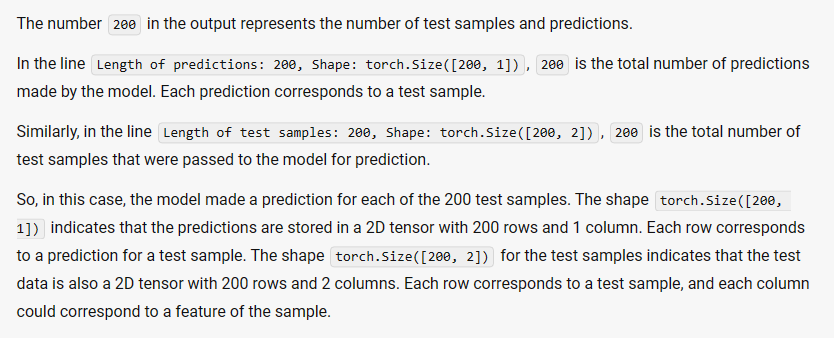

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 samples:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 samples:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### **2.1 Building a model**

Which loss function or optimizer should you use?

Again... this is problem specific.

E.g: for **REGRESSION** (numbers) you might want **MAE or MSE** (Mean Absolute Error or Mean Squared Error).

For **CLASSIFICATION** you might want **BINARY CROSS ENTROPY (BCE) or CATEGORICAL CROSS ENTROPY (CROSS ENTROPY)**.

As a reminder, the loss function measures how **WRONG YOUR MODEL'S PREDICTIONS ARE**.

For **OPTIMIZERS,** two of the most common and useful are **SGD and ADAM,** however, PyTorch has many built-in functions.

For the **LOSS FUNCTIONS** we are going to use **BCEWithLogitsLoss()**

For different **OPTIMIZERS** see **torch.optim**

In [ ]:
# Setup the loss function
# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
# nn.Sequential(
   # nn.Sigmoid(),
   # nn.BCELoss()
# ) # We get something to this - loss_fn = nn.BCEWithLogitsLoss()

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [ ]:
# Calculate accuracy - out of 100 examples,  what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### **3. Train a model**

To train our model, we're gonna need to build a training loop with the following steps:

**1. FORWARD PASS**

**2. CALCULATE THE LOSS**

**3. OPTIMIZER ZERO GRAD**

**4. LOSS BACKWARD (BACKPROPAGATION)**

**5. OPTIMIZER STEP (GRADIENT DESCENT)**

### **3.1 Going from raw logits ▶ prediction probabilities ▶ prediction labels**

Our model outputs are going to be raw **LOGITS**. **LOGITS** whatever comes out of the **FORWARD FUNCTION** of the layers of our model (model_0)

We convert these **LOGITS** into **PREDICTION PROBABILITIES** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction to **PREDICTION LABELS** by either rounding them or taking the **argmax()**

**ROUND is for BINARY CLASSIFICATION**

**ARGMAX() is for SOFTMAX ACTIVATION FUNCTION**

### The **logits** are the raw outputs of our model without being passed to any **activation function**.

### The activation function is something separate from the layer.

In [ ]:
# View the first 5 outputs of the forward pass on the test data.
model_0.eval()
with torch.inference_mode():
 y_logits = model_0(X_test.to(device)) [:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### **SIGMOID ACTIVATION FUNCTION ALGORITHM**

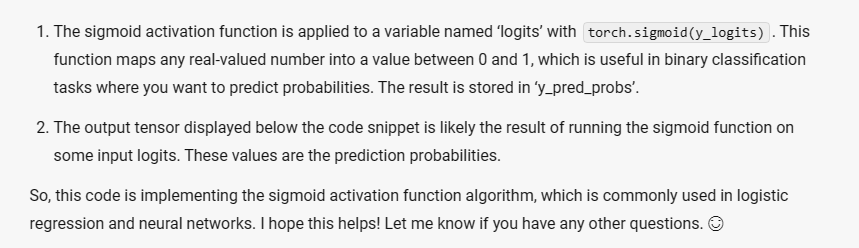

In [ ]:
# Use the Sigmoid Activation Function on our model LOGITS to turn them into prediction probabilities.
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

### For our prediction probability values, we need to perform a range-style rounding on them:

**You can adjust this DECISION BOUNDRY**

* **y_pred_probs >= 0,5, y=1 (class 1)**
* **y_pred_probs < 0,5 y=0 (class 0)**

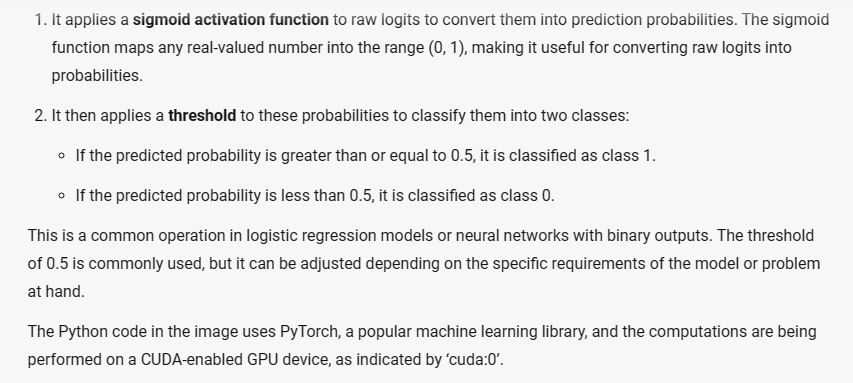

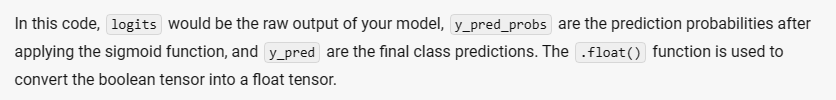

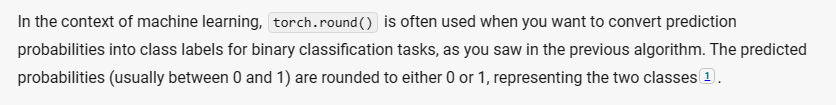

In [ ]:
torch.round(y_pred_probs) # We can't use torch.round() on raw logits.
# torch.sigmoid() Sigmoid activation function is required to turn them into prediction probabilities.

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

### **FINDING THE PREDICTED LABELS ALGORITHM**

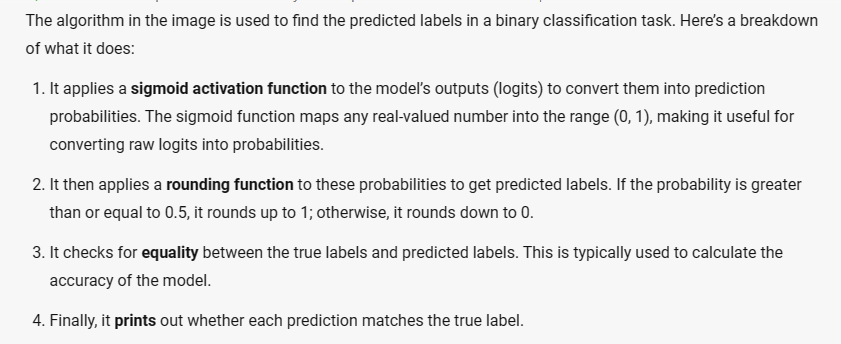

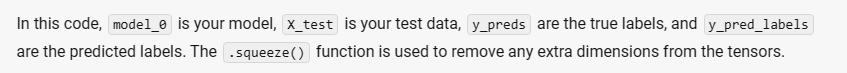

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

### **3.2 Building a training and testing loop**

### **  loss = loss_fn(torch.sigmoid(y_logits), # We need to call this loss_fn(torch.sigmoid(y_logits) on the logits.**
                  nn.BCELoss expects PREDICTION PROBABILITIES as input.
                               y_train)

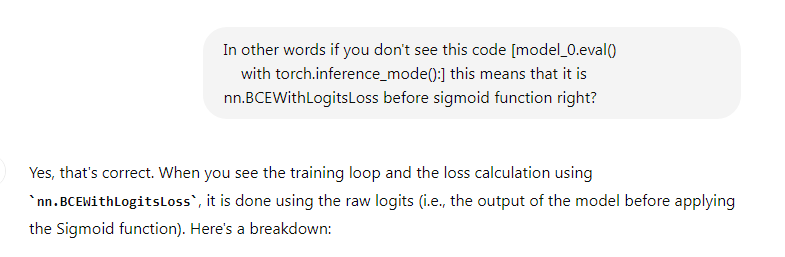

In [ ]:
import torch
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### TRAINING
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze() # Raw logits from the model
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred prob -> pred label | Apply Sigmoid to logits and then round to get predicted labels

  # 2. Calculate loss/accuracy | (use raw logits with nn.BCEWithLogitsLoss)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input.
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred) # This is our custom accuracy we created in the previous step.
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation) Calculate the gradience with respect to all of the parameters in the model.
  loss.backward()

  # 5. Optimizer step (Update the parameters to reduce the GRADIENT or GRADIENT DESCENT)
  optimizer.step()

  ### TESTING
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze() # Raw logits from the model
    test_pred = torch.round(torch.sigmoid(test_logits)) # Apply Sigmoid to logits and then round to get predicted labels

    # 2. Calculate test loss/acc | (use raw logits with nn.BCEWithLogitsLoss)
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}% ")


Epoch: 0 | Loss: 0.69796, Acc: 51.88% | Test Loss: 0.69440, Test Acc: 58.00% 
Epoch: 10 | Loss: 0.69590, Acc: 51.25% | Test Loss: 0.69305, Test Acc: 53.00% 
Epoch: 20 | Loss: 0.69490, Acc: 51.62% | Test Loss: 0.69254, Test Acc: 49.50% 
Epoch: 30 | Loss: 0.69435, Acc: 51.12% | Test Loss: 0.69236, Test Acc: 49.50% 
Epoch: 40 | Loss: 0.69401, Acc: 50.88% | Test Loss: 0.69232, Test Acc: 51.00% 
Epoch: 50 | Loss: 0.69378, Acc: 50.25% | Test Loss: 0.69234, Test Acc: 50.00% 
Epoch: 60 | Loss: 0.69362, Acc: 50.00% | Test Loss: 0.69239, Test Acc: 51.50% 
Epoch: 70 | Loss: 0.69351, Acc: 50.25% | Test Loss: 0.69246, Test Acc: 51.00% 
Epoch: 80 | Loss: 0.69342, Acc: 49.88% | Test Loss: 0.69254, Test Acc: 50.00% 
Epoch: 90 | Loss: 0.69336, Acc: 49.88% | Test Loss: 0.69262, Test Acc: 53.00% 


In [ ]:
loss_fn_without_logits = nn.BCELoss() # This loss expects the prediction probabilities as input.
loss_fn_without_logits

BCELoss()

### **4 Make predictions and evaluate the model**

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make them visual!

In other words, "Visualize, Visualize, Visualize!"

To do so, we're going to import a function called **'plot_decision_boundary()'**

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it is not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open ("helper_functions.py", "wb") as f: # wb = write binary | f = file
    f.write(request.content)
  from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


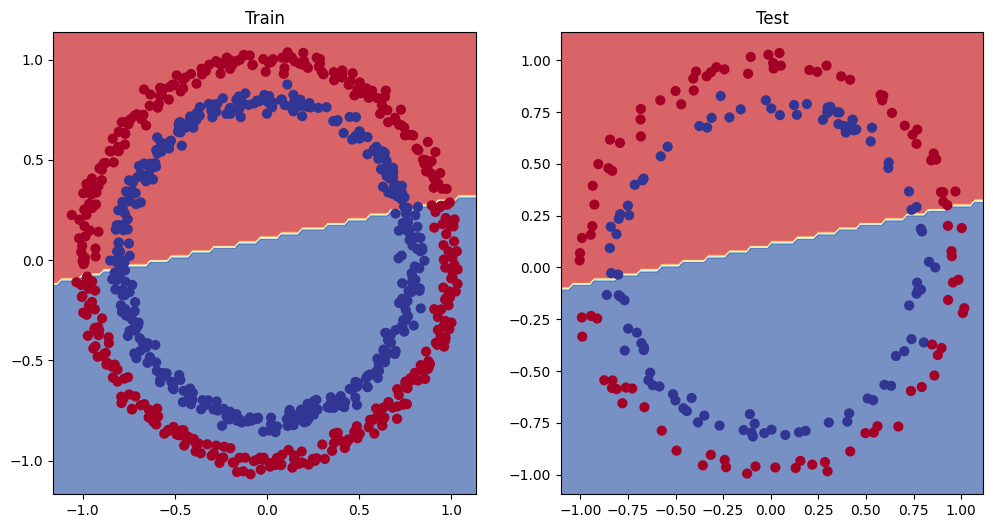

In [ ]:
# Plot Decision Boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1 - row, 2 - column, 1 - index
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### **5. Improving a model (from a model perspective)**

* Add more layers - give the model more chances to learn about patterns in the data.
* Add more hidden units - go from 5 hidden units to 10 hidden units.
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because these options are all values we (as machine learning engineers and data scientists) can change, they are reffered to as **HYPERPARAMETERS**.

**PARAMETERS = WEIGHTS AND BIASES** are the numbers within a **MODEL.**

**PARAMETERS** are the values a **MODEL UPDATES BY ITSELF.**

Let's try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

**When you are doing machine learning experiments, you'd only like to change one value at a time and track the results. This is called an EXPERIMENT TRACKING IN MACHINE LEARNING**

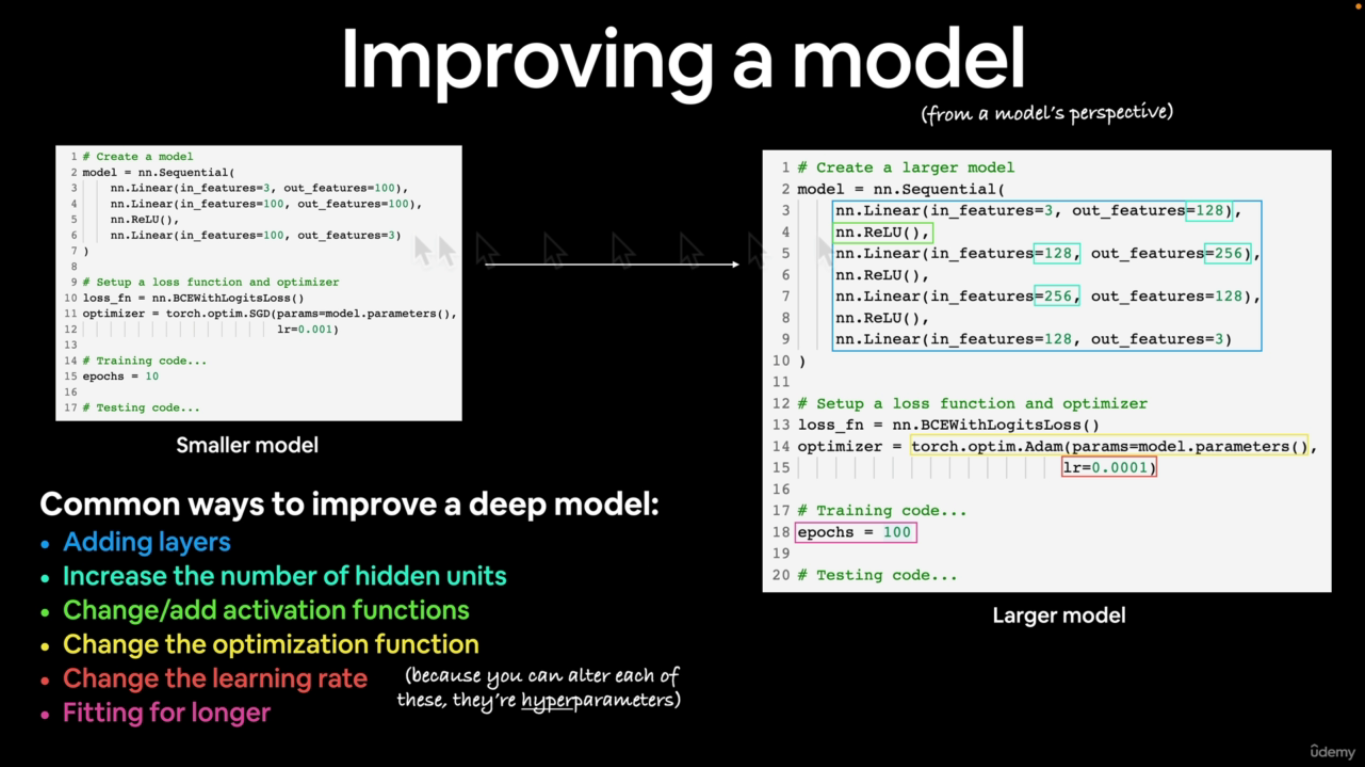

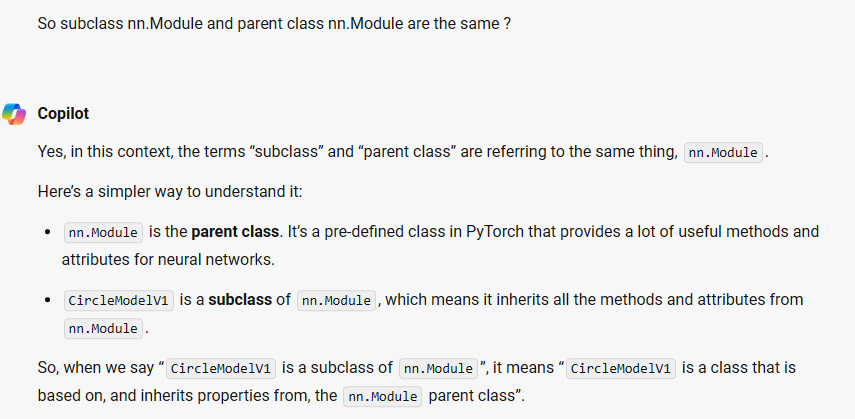

In [ ]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0'))

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
   # z = self.layer_1(x)
   # z = self.layer_2(z)
   # z = self.layer_3(z)
   # return z | z = logits's form. In this case, that's just passing our data through each one of these layers above.

   # This way of writing OPERATIONS leverages speed ups where possible behind the scenes.
   return self.layer_3(self.layer_2(self.layer_1(x)))

# Let's create an instance of CircleModelV1
model_1 = CircleModelV1().to(device) # We're gonna send it to TARGET DEVICE
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# 2. Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### TRAINING
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (BACKPROPAGATION)
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### TESTING
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Acc: 50.88% | Test Loss: 0.69261, Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305, Acc: 50.38% | Test Loss: 0.69379, Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299, Acc: 51.12% | Test Loss: 0.69437, Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298, Acc: 51.62% | Test Loss: 0.69458, Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.12% | Test Loss: 0.69465, Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69467, Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test Loss: 0.69468, Test Acc: 46.00%


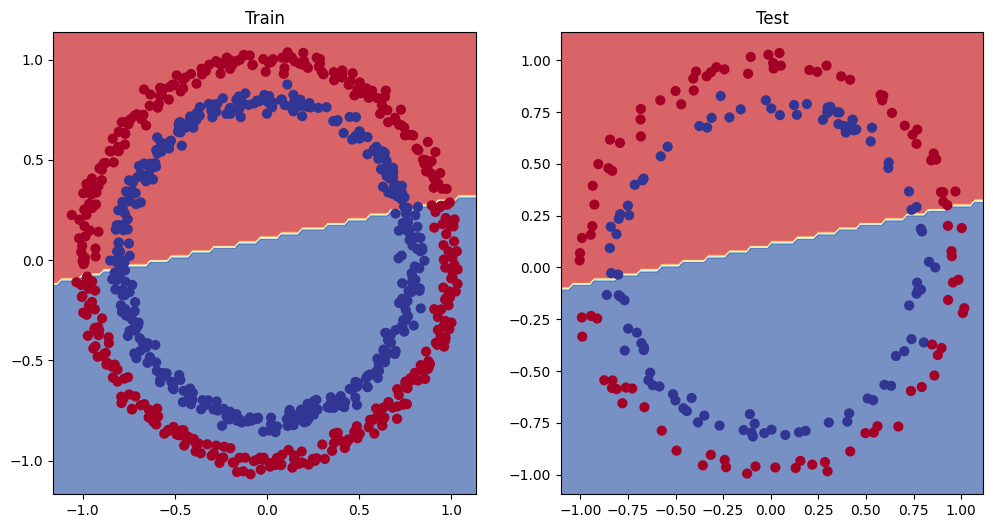

In [ ]:
# Plot Decision Boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1 - row, 2 - column, 1 - index
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### **5.1 Preparing data to see if our model can fit a straight line**

One way to troubleshoot to a larger problem is to test our a smaller problem.

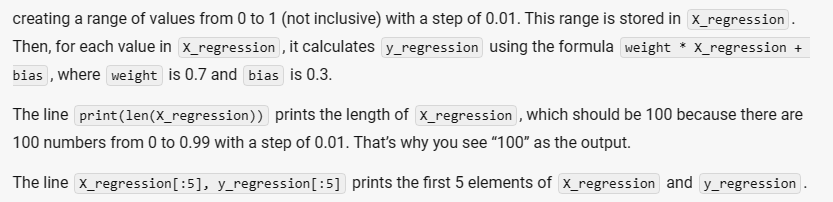

In [ ]:
# 1. Create *KNOWN* PARAMETERS
weight = 0.7
bias = 0.3

# 2. Create data
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear Regression Formula (without epsilon)

# 3. Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

### **Create train and test splits**

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lenght of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

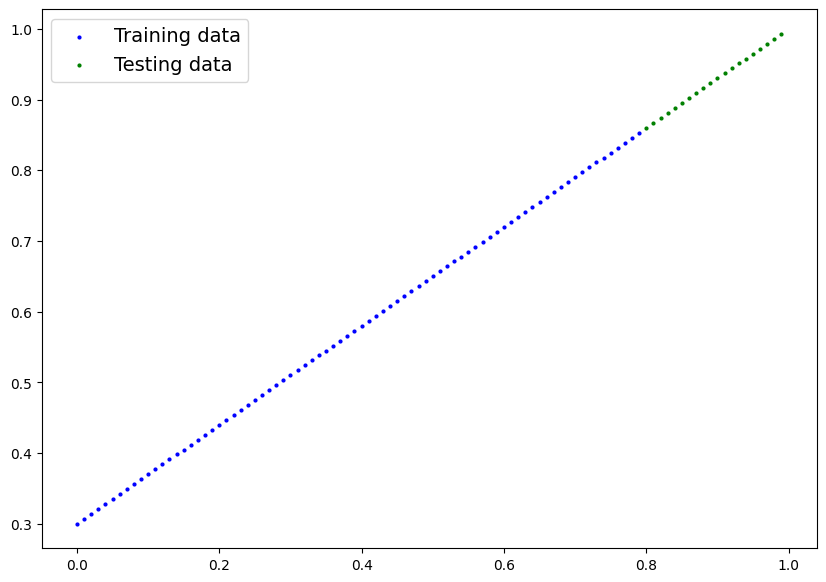

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

### **5.2 Adjusting "model_1" to fit a straight line.**



In [ ]:
# Same architecture as model_1 (but using nn.Sequential)
# Within the "nn.Sequential" there is a hidden forward method. But it is less flexible.
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss() # MAE Loss with Regression Data
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)
# lr (learning rate) is the amount of each parameter or multiplier that will be applied to each parameter of each epoch.

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

### TRAINING
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### TESTING
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test_loss: {test_loss:.5f}") # loss:.5f (take 5

Epoch: 0 | Loss: 0.75986 | Test_loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test_loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test_loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test_loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test_loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test_loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test_loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test_loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test_loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test_loss: 0.00360


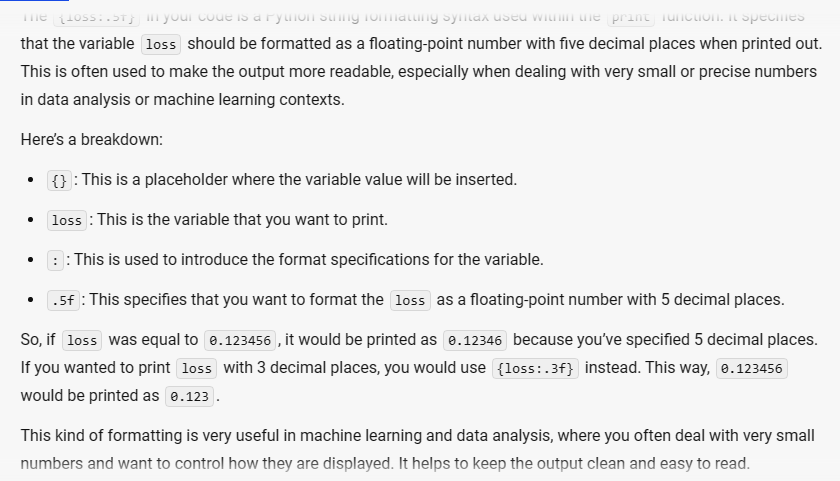

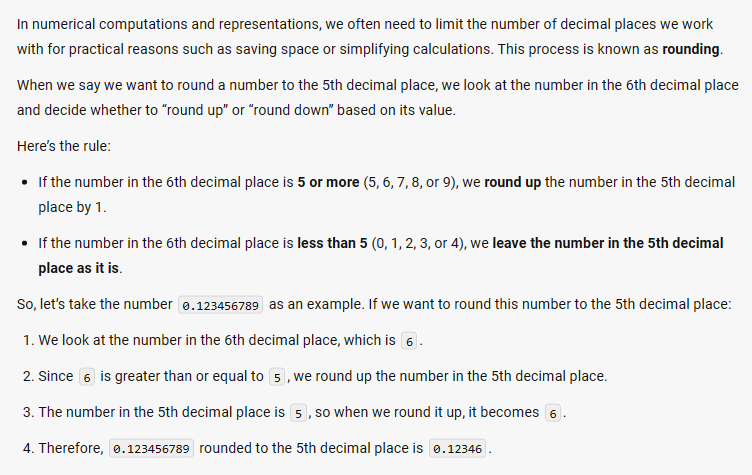

**How to SOLVE THIS ERROR?**

**PLOT PREDICTIONS FUNCTION USES MATPLOTLIB AND REFERENCES NUMPY(NUMERICAL COMPUTING LIBRARY). AND NUMPY USES CPU() NOT GPU()**

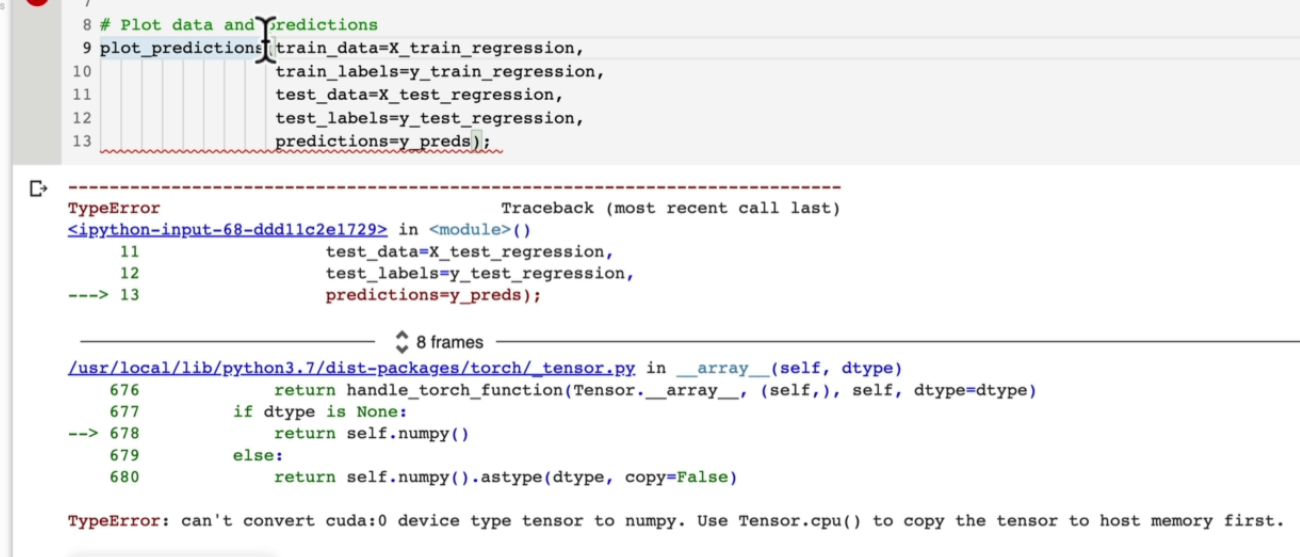

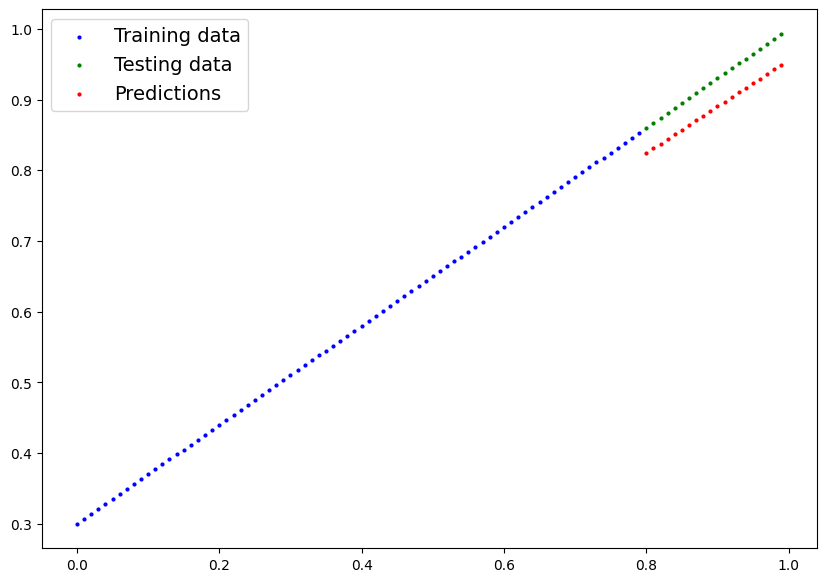

In [ ]:
# Turn on Evaluation Mode
model_2.eval()

# Make Predictions (Inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot Data and Predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

# **6. The missing piece: NON-LINEARITY**

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but it is really finite) of linear and non-linear functions?


## **6.1 Recreating NON-LINEAR DATA (red and blue circles)**

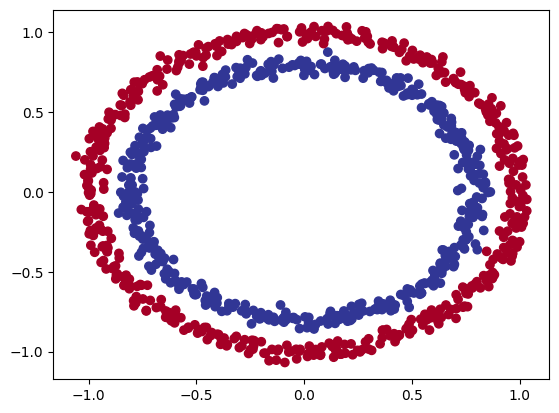

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

### **ALGORITHM OF CONVERTING DATA to TENSORS and then to TRAIN and TEST SPLITS**

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn DATA into TENSORS
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

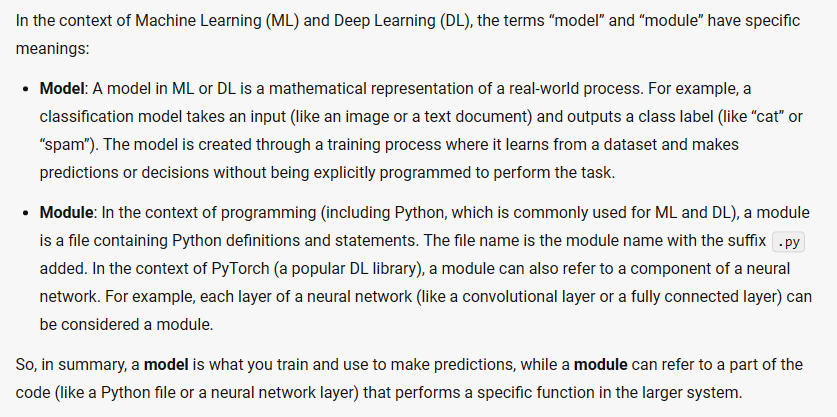

### **6.2 ALGORITHM of building a MODEL with NON-LINEARITY**

* Linear = straight line
* Non-linear = Non-straight line

**Artificial Neural Networks** are a large combination of linear (straight line) and non-linear (non-straight line) functions which are potentially able to find patterns in data.

In [ ]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # ReLU is a non-linear activation function

  def forward(self, x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

#### Usage
**Spam or not spam**

**Credit cards = fraud or not fraud**

**Insurance claims = at fault or not at fault**

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

### **6.3 Training a model with NON-LINEARITY**

In [ ]:
len(X_test), len(y_test)

(200, 200)

In [ ]:
# Random Seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all DATA on TARGET DEVICE
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through DATA
epochs = 1000

for epoch in range(epochs):
  ### TRAINING
  model_3.train()

  # 1. Forward Pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # Logits -> prediction probabilities -> prediction labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer the step | ReLU doesn't have any parameters to OPTIMIZE
  optimizer.step()

  ### TESTING
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")
  # Our model learns PATTERNS on the TRAINING DATASET.
  # AND EVALUATES those learned PATTERNS on the TEST DATASET.

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.6910, Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.6894, Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.6872, Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6841, Test Acc: 56.50%
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.6794, Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.6729, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.6632, Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.6476, Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.6215, Test Acc: 79.00%


### **6.4 Evaluating a model trained with NON-LINEAR ACTIVATION FUNCTION**

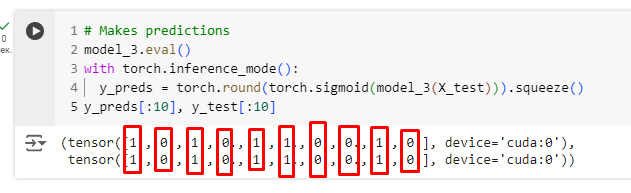

In [ ]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

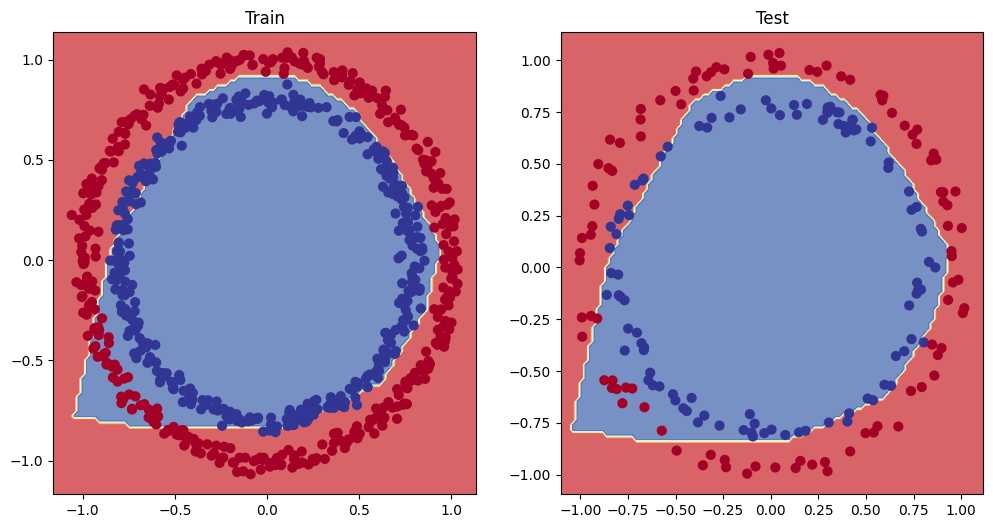

In [ ]:
# Plot Decision Boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1 - row, 2 - column, 1 - index
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### **7. Replicating non-linear activation functions.**

Neural Networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on his own.

And these tools are linear & non-linear functions.

In [ ]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

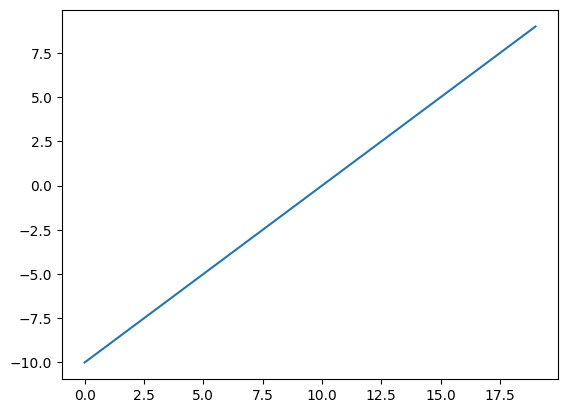

In [ ]:
# Visualize the tensor
plt.plot(A);

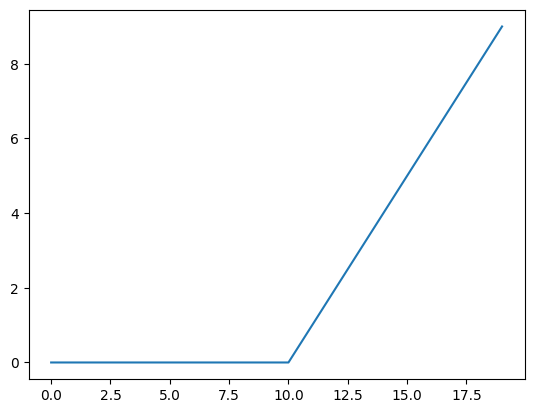

In [ ]:
plt.plot(torch.relu(A));

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x) # inputs must be TENSORS

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

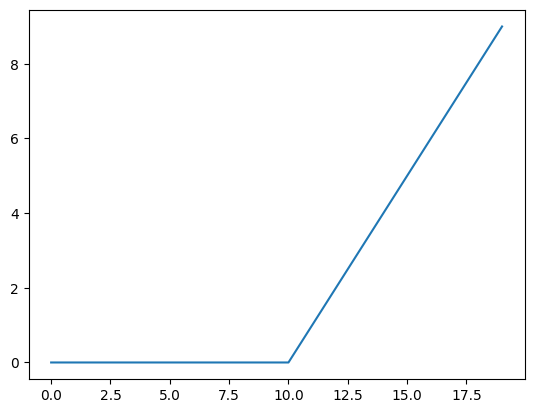

In [ ]:
# Plot ReLU Activation Function
plt.plot(relu(A));

### **SIGMOID FUNCTION**

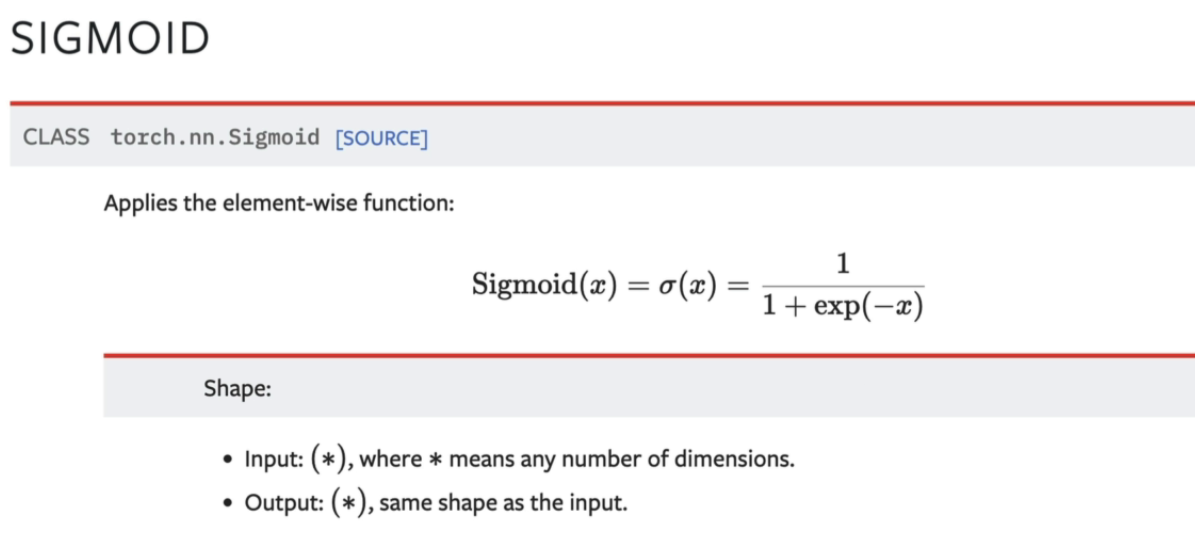

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

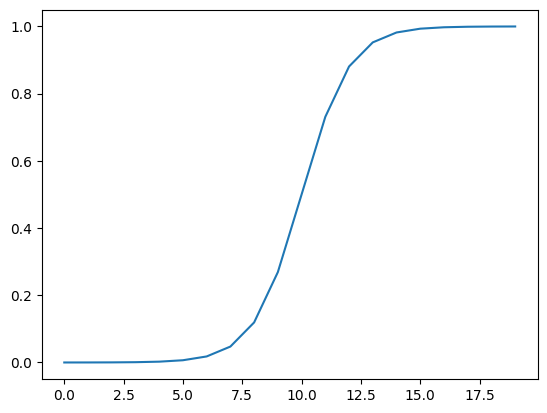

In [ ]:
plt.plot(torch.sigmoid(A));

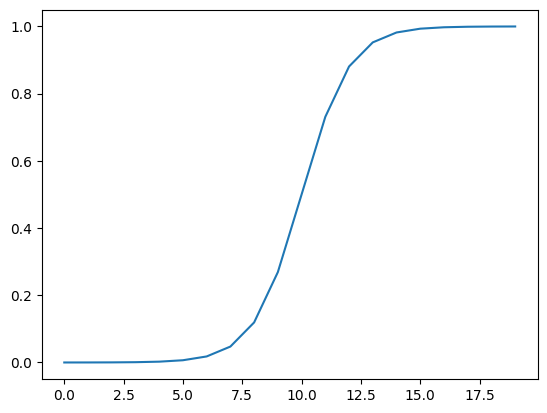

In [ ]:
plt.plot(sigmoid(A));

### **8. Putting it all together with a multi-class classification problem.**

* Binary Classification = one thing or another (cat vs. dog, spam vs. not spam, fraud vs. not fraud)

* Multi-class Classification = more than one thing or another (cat vs. dog vs. bird)

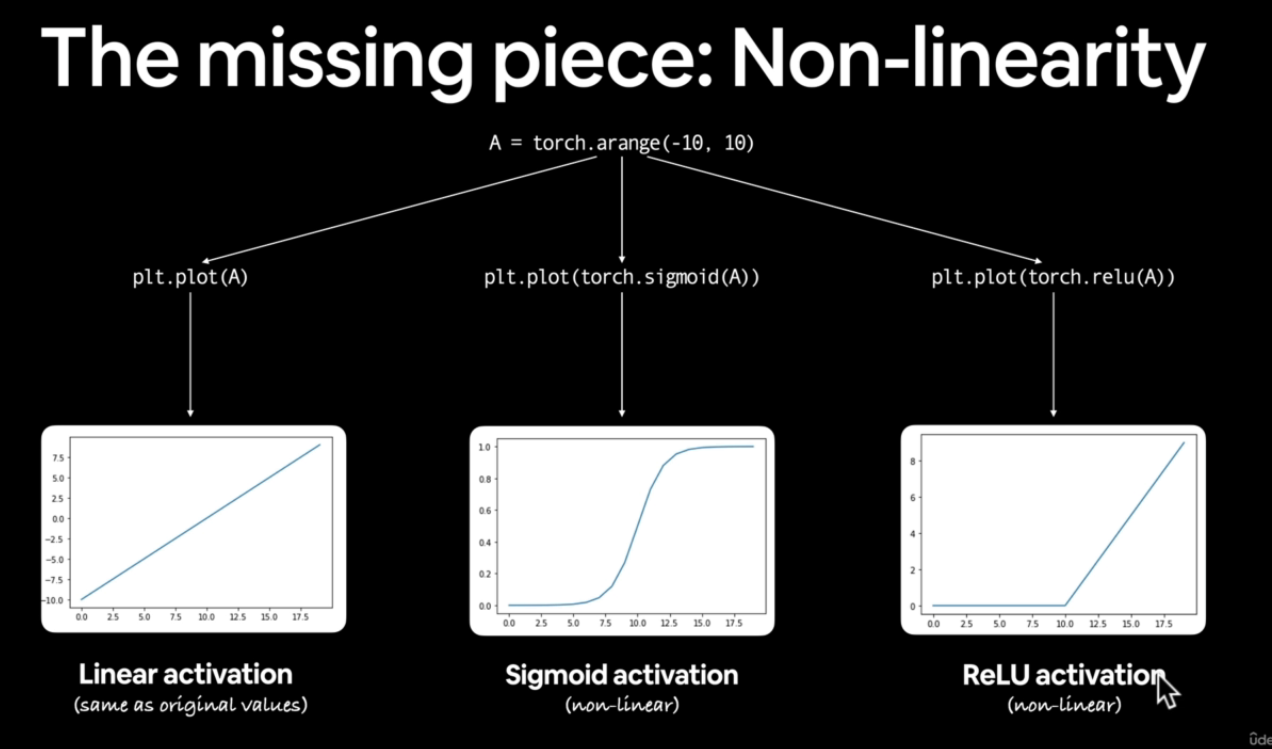

### **8.1 Creating a toy multi-class dataset**

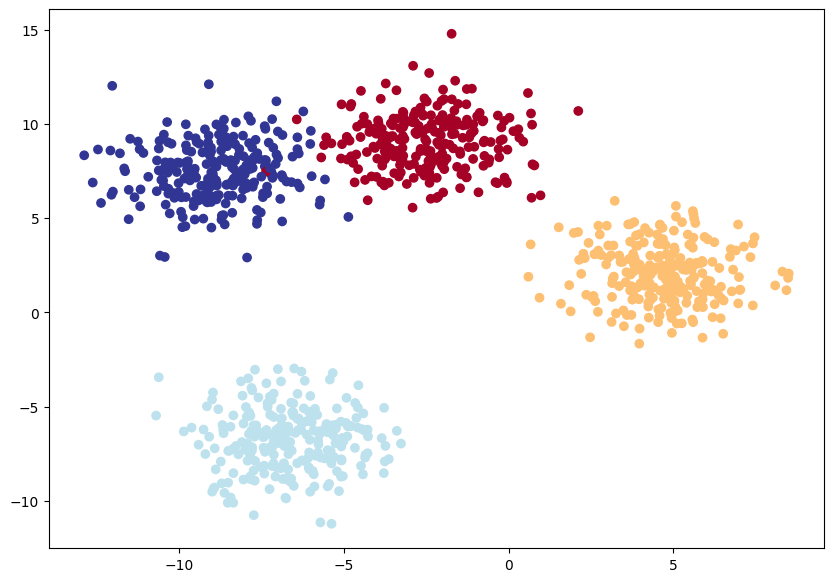

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

# Set the HYPERPARAMETERS for data creation
# HYPERPARAMETERS are capitalized. These are some settings to change.
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up.
                            random_state=RANDOM_SEED)

# 2. Turn DATA into TENSORS
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into TRAIN and TEST
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, # Normally train_test_split is random.
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED) # We set radnom_seed for reproducibility
# TEST SIZE = 80% of our DATA will be for TRAINING DATA and 20% will be for TEST DATA.

# 4. Plot Data (Visualize, Visualize, Visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### **8.2 ALGORITHM of MULTI-CLASS CLASSIFICATION.**

We need to build a model that's gonna draw some lines between these four colours. 2 axis for different classes.

In [ ]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

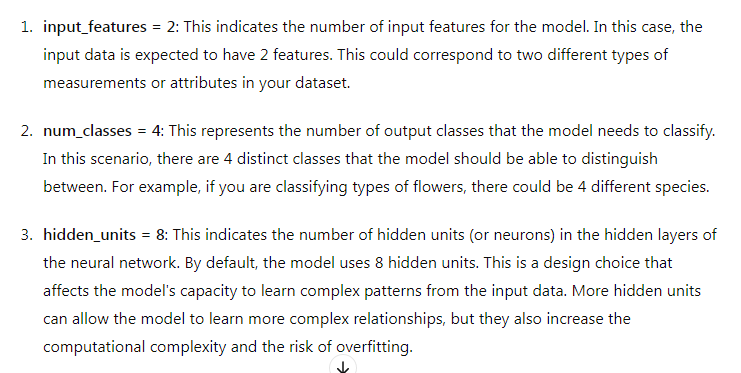

In [ ]:
# Build a MULTI-CLASS CLASSIFICATION MODEL
class BlobModel(nn.Module):
  def __init__(self, input_features, num_classes, hidden_units=8):
    """Initializes MULTI-CLASS CLASSIFICATION MODEL.

    Args:
    input_features (int): Number of input features to the model
    output_features (int): Number of output features (number of OUTPUT CLASSES)
    hidden_units (int): Number of hidden units between layers, DEFAULT is 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units), # Because this is not the FINAL LAYER
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=num_classes)
    )
  def forward(self, x): # Whatever inputs go into the FORWARD METHOD, it is gonna go through the layers above sequentially.
    return self.linear_layer_stack(x) # We need self. beacause we initialize it in the constructor.

# Create an INSTANCE of BLOB MODEL and send it to the TARGET DEVICE.
model_4 = BlobModel(input_features=2,
                    num_classes=4, # Output features (4 classes) are gonna be the same as the number of classes that we have.
                    hidden_units=8).to(device) # Hidden_units are by default. We just set it there.

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

### **8.3 ALGORITHM of creating a LOSS FUNCTION and an OPTIMIZER for a MULTI-CLASS CLASSIFICATION MODEL.**

In [ ]:
# Create a LOSS FUNCTION for MULTI-CLASS CLASSIFICATION - LOSS FUNCTION measures how wrong our model's predictions are.
loss_fn = nn.CrossEntropyLoss()

# Create an OPTIMIZER for MULTI-CLASS CLASSIFICATION - OPTIMIZER updates our model PARAMETERS to try and reduce the LOSS.
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # Learning rate is a hyperparameter you can change

### **8.4 Getting PREDICTION PROBABILITIES for a MULTI-CLASS PyTorch model**

In order to **EVALUATE TRAIN and TEST our MODEL,** we need to convert our model's outputs (LOGITS) to PREDICTION PROBABILITIES and then to PREDICTION LABELS.

**LOGITS (raw output of the model) -> PRED PROBS (use "torch.softmax") -> PRED LABELS (take the ARGMAX (which return the index of whether the maximum value occurs in the pred prob) of the prediction probabilities)**

In [ ]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [ ]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [ ]:
next(model_4.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [ ]:
torch.max(y_pred_probs[0])

tensor(0.3715, device='cuda:0')

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(3, device='cuda:0')

In [ ]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

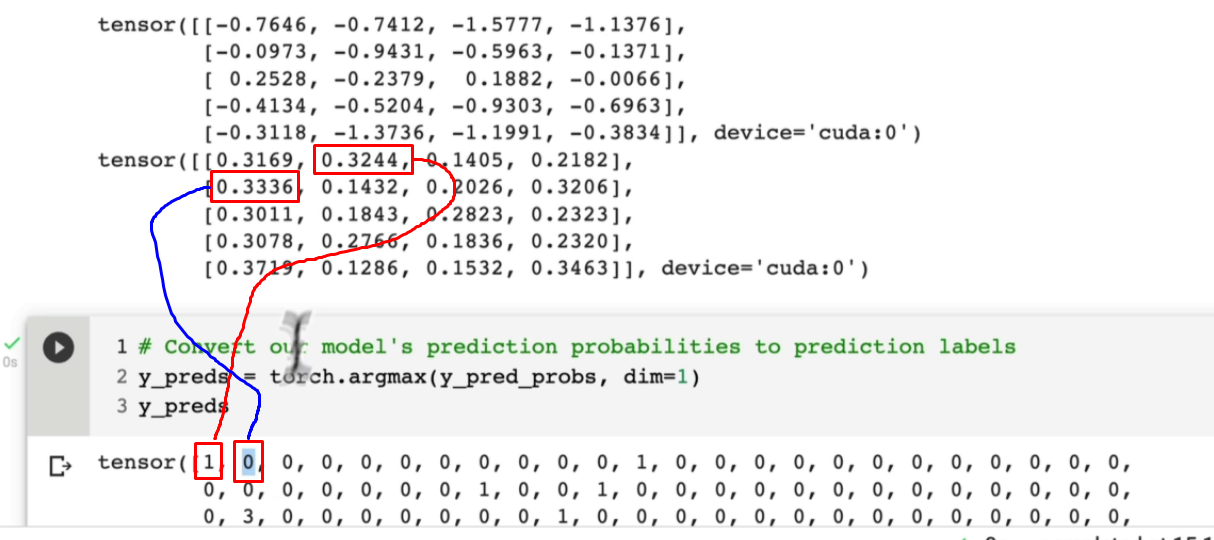

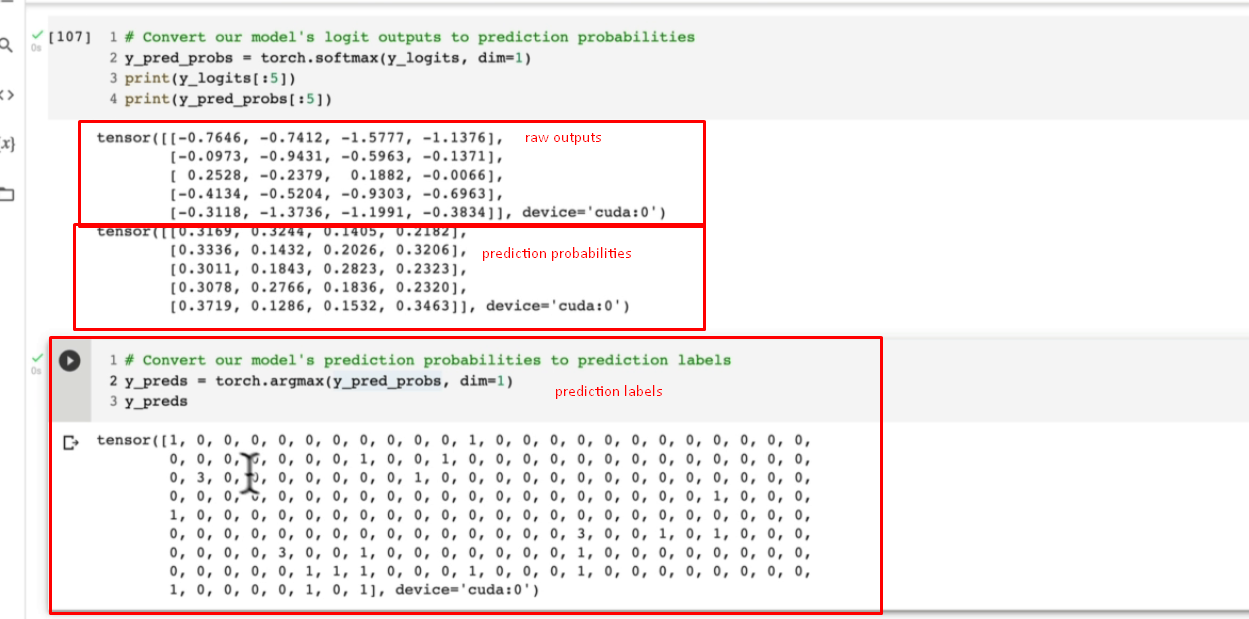

### **8.5 ALGORITHM of creating a TRAINING LOOP and TESTING LOOP for a MULTI-CLASS PyTorch MODEL**

In [ ]:
# Fit the MULTI-CLASS MODEL to the DATA
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
epochs = 100

# Put DATA to the TARGET DEVICE
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# LOOP through DATA
for epoch in range(epochs):
  ### TRAINING
  model_4.train()

  # 1. Forward Pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. Calculate the loss/accuracy
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (Backpropagation)
  loss.backward()

  # 5. Optimizer the step
  optimizer.step()

  ### TESTING
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.0432, Acc: 65.50% | Test Loss: 0.5786, Test Acc: 95.50%
Epoch: 10 | Loss: 0.1440, Acc: 99.12% | Test Loss: 0.1304, Test Acc: 99.00%
Epoch: 20 | Loss: 0.0806, Acc: 99.12% | Test Loss: 0.0722, Test Acc: 99.50%
Epoch: 30 | Loss: 0.0592, Acc: 99.12% | Test Loss: 0.0513, Test Acc: 99.50%
Epoch: 40 | Loss: 0.0489, Acc: 99.00% | Test Loss: 0.0410, Test Acc: 99.50%
Epoch: 50 | Loss: 0.0429, Acc: 99.00% | Test Loss: 0.0349, Test Acc: 99.50%
Epoch: 60 | Loss: 0.0391, Acc: 99.00% | Test Loss: 0.0308, Test Acc: 99.50%
Epoch: 70 | Loss: 0.0364, Acc: 99.00% | Test Loss: 0.0280, Test Acc: 99.50%
Epoch: 80 | Loss: 0.0345, Acc: 99.00% | Test Loss: 0.0259, Test Acc: 99.50%
Epoch: 90 | Loss: 0.0330, Acc: 99.12% | Test Loss: 0.0242, Test Acc: 99.50%


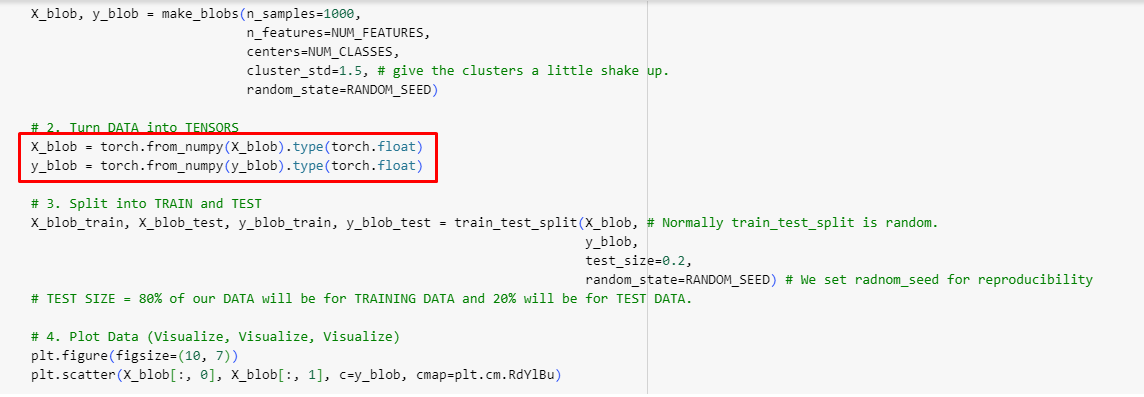

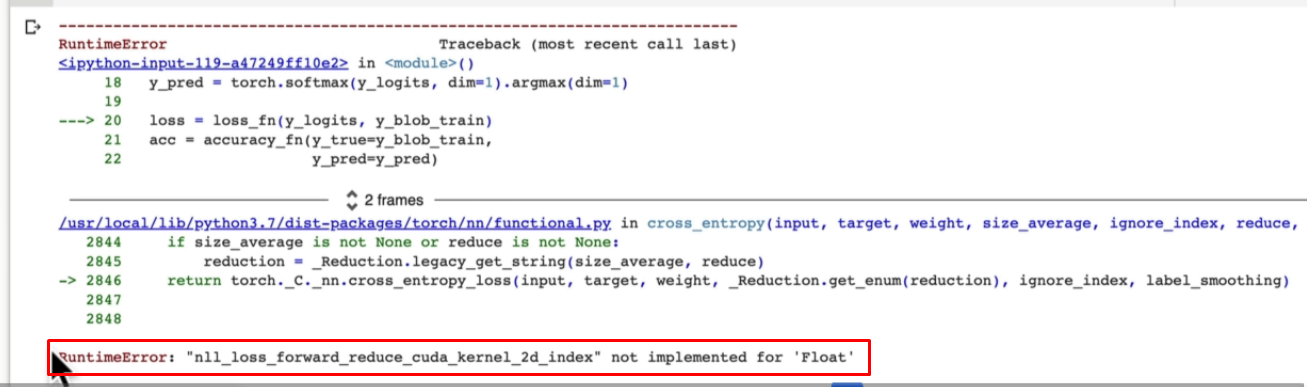

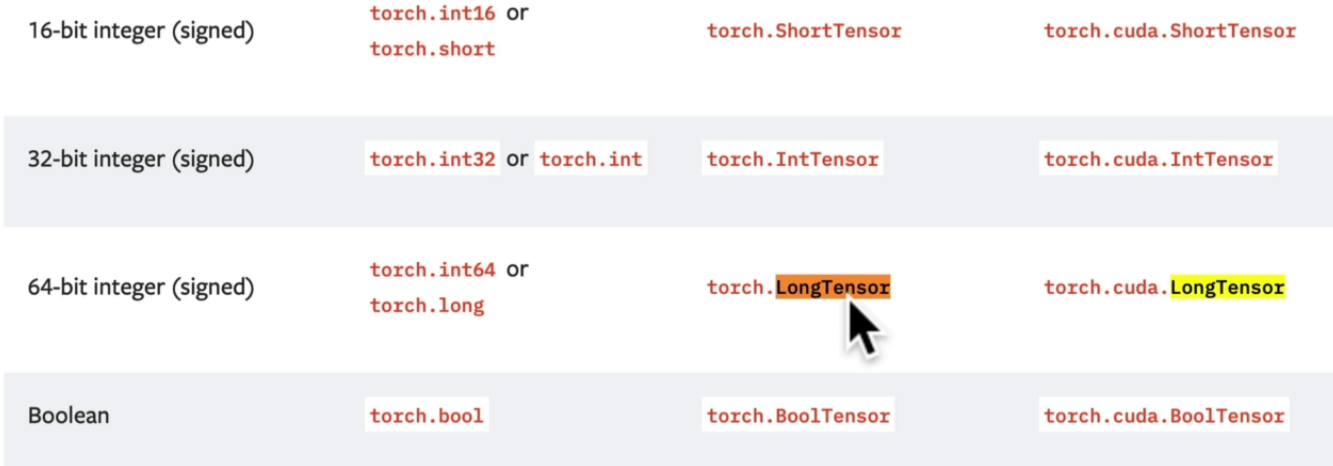

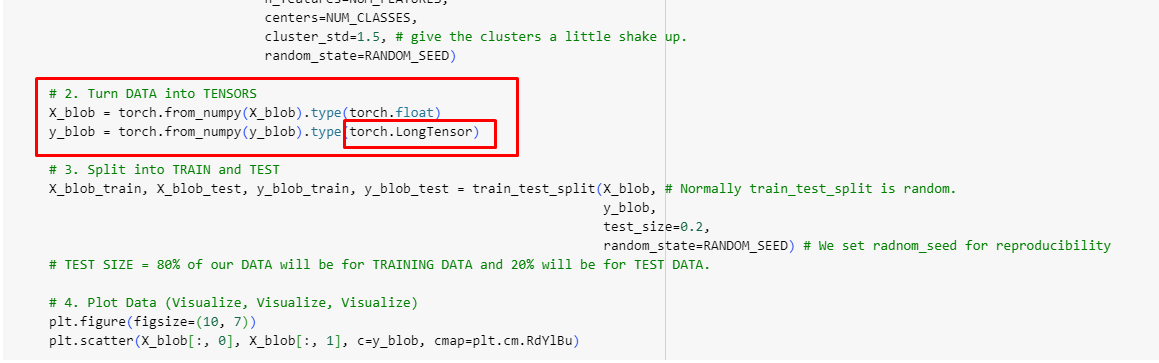

### **8.6 ALGORITHM of making and EVALUATING predictions with a PyTorch MULTI-CLASS MODEL**

In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [ ]:
# Go from LOGITS -> PREDICTION PROBABILITIES
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3698e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2267e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5436e-08, 4.7620e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4288e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8305e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0768e-09, 2.0006e-04]], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [ ]:
# Go from PREDICTION PROBABILITIES -> PREDICTION LABELS
y_preds = torch.argmax(y_pred_probs, dim=1) # OR y_pred_probs.argmax()
y_preds[:10]


tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

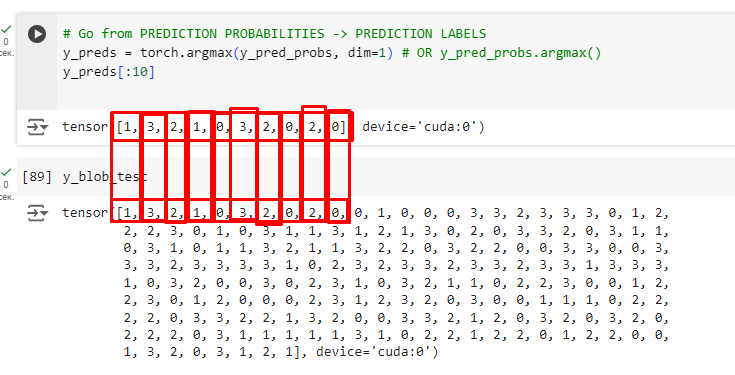

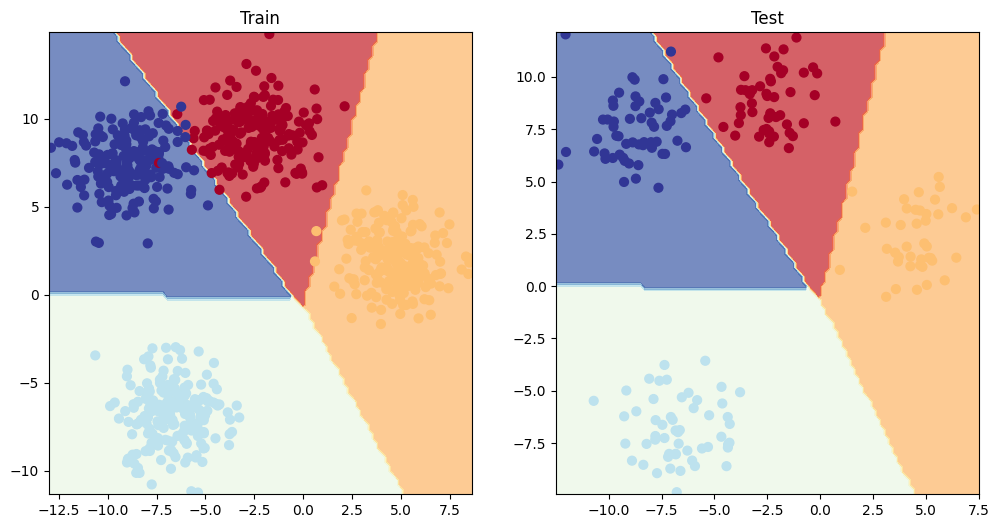

In [ ]:
# Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

### **9. A few more CLASSIFICATION METRICS... (to EVALUATE our CLASSIFICATION MODEL)**

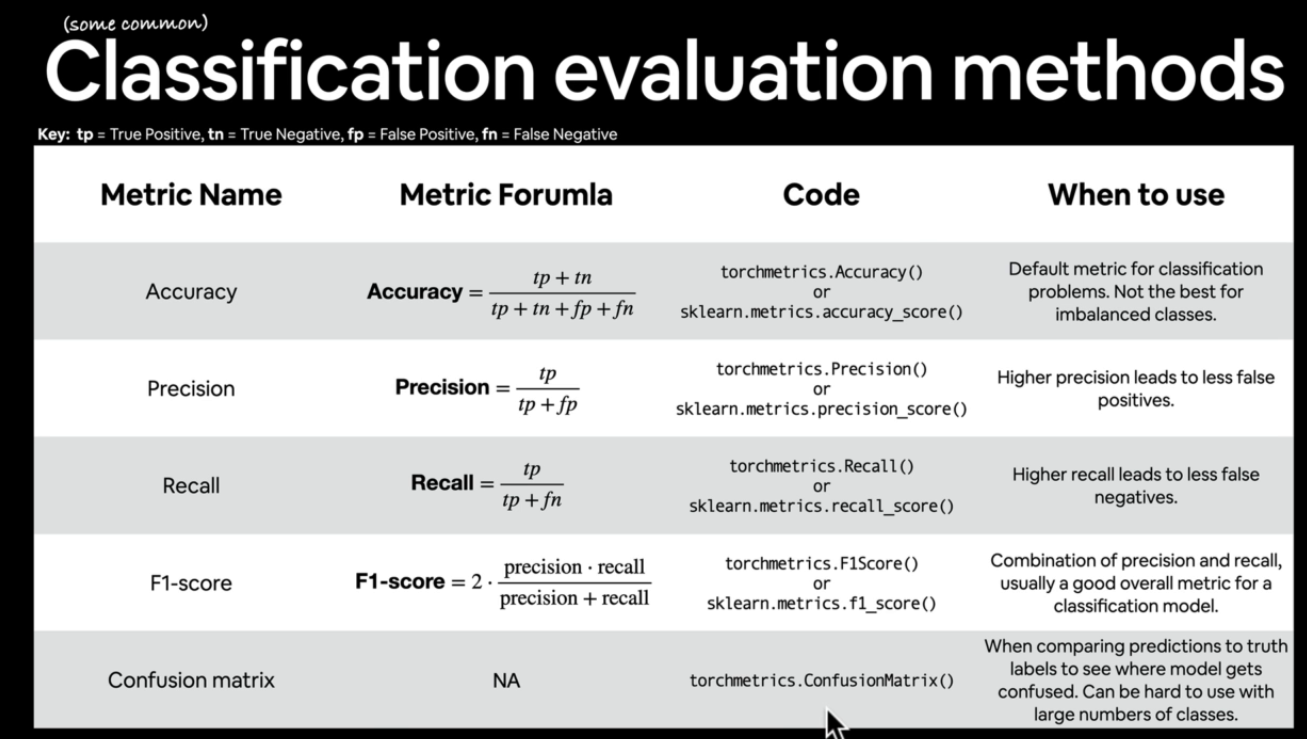

In [ ]:
# Let's try the torchmetrics.Accuracy() metric out.
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)